In [1]:
#import BruinKeijman as bk
from datetime import datetime, timedelta
import os 
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import io
from nbformat import current
from scipy.stats import kendalltau
import seaborn as sns
from scipy import stats
%matplotlib inline

c:\python35\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
def execute_notebook(nbfile):
    
    with io.open(nbfile,encoding="utf8") as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

NameError: name 'array_water' is not defined

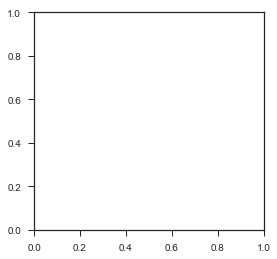

Functies de Bruin-Keijmanmethode geladen, beschikbaar als bk_xxx


In [3]:
execute_notebook('2017-01-25 BRON De Bruin-Keijmanmethode.ipynb')

In [ ]:
# overview van de gebruikte constanten
for item in constanten:
    print (item)
    for values in constanten[item]:
        print (' ',values,':',constanten[item][values]) 

In [ ]:
# overview van de gebruikte variabelen
for item in variabelen:
    print (item)
    for values in variabelen[item]:
        print (' ',values,':',variabelen[item][values])

In [ ]:
# latente warmte stroom combinateis to calculate
# E_1_3_5 static Albedo (1)   LnettonInLW (3)    KinSW (5)          x
# E_1_3_6 static Albedo       LnettonInLW        KinStation (6)     -
# E_1_4_5 static Albedo       LnettonStation (4) KinSW              x
# E_1_4_6 static Albedo       LnettonStation     KinStation         x
# E_2_3_5 EUMETSAT Albedo (2) LnettonInLW        KinSW              -
# E_2_3_6 EUMETSAT Albedo     LnettonInLW        KinStation         -
# E_2_4_5 EUMETSAT Albedo     LnettonStation     KinSW              -
# E_2_4_6 EUMETSAT Albedo     LnettonStation     KinStation         -

# template raster, array, extent used to save new arrays
raster, array, extent = inRaster(dict_Albedo[dates_Albedo[0]])
mask_all_except = water # 

# plot all data
for date in dates_InSW:
    
    date_Albedo = min(dates_Albedo, key=lambda d: abs(d - date))    
    x = date.timetuple().tm_yday
    #print ('date_Albedo',date_Albedo)    
    print ('date: ',date,'doy: ',x)
    
    # get file names of each parameter
    file_Albedo  = dict_Albedo[date_Albedo]
    file_InLW    = dict_InLW[date]    
    file_InSW    = dict_InSW[date]
    file_Tmean   = dict_Tmean[date]
    file_Tmin    = dict_Tmin[date]
    file_Tmax    = dict_Tmax[date]
    file_Kmean   = dict_Kmean[date]
    file_Kmin    = dict_Kmin[date]
    file_Kmax    = dict_Kmax[date]
    file_Nmean   = dict_Nmean[date]    
    file_Pmean   = dict_Pmean[date]    
    file_Qsum    = dict_Qsum[date]    
    file_Umean   = dict_Umean[date] 
    
#     # LOADING DATASETS :: get arrays of each parameter
#     array_Albedo = gdal.Open(file_Albedo).ReadAsArray()
#     array_Albedo = np.ma.masked_array(array_Albedo, mask_all_except.mask)    
#     df['albedo'][date] = array_Albedo.compressed().mean()

    array_InLW   = gdal.Open(file_InLW).ReadAsArray()
    array_InLW   = np.ma.masked_array(array_InLW, mask_all_except.mask)
    df['inkomende langgolvige straling'][date] = array_InLW.compressed().mean()

    array_InSW   = gdal.Open(file_InSW).ReadAsArray()
    array_InSW   = np.ma.masked_array(array_InSW, mask_all_except.mask) 
    df['inkomende kortgolvige straling'][date] = array_InSW.compressed().mean()
    
    array_Tmean  = gdal.Open(file_Tmean).ReadAsArray()
    array_Tmean  = np.ma.masked_array(array_Tmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in graden'][date] = array_Tmean.compressed().mean()
    
    array_Tmax   = gdal.Open(file_Tmax).ReadAsArray()
    array_Tmax   = np.ma.masked_array(array_Tmax, mask_all_except.mask)
    df['maximum dagtemperatuur in graden'][date] = array_Tmax.compressed().mean()    
    
    array_Tmin   = gdal.Open(file_Tmin).ReadAsArray()
    array_Tmin   = np.ma.masked_array(array_Tmin, mask_all_except.mask)
    df['minimum dagtemperatuur in graden'][date] = array_Tmin.compressed().mean()
    
    array_Kmean  = gdal.Open(file_Kmean).ReadAsArray()
    array_Kmean  = np.ma.masked_array(array_Kmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in Kelvin'][date] = array_Kmean.compressed().mean()
    
    array_Kmax   = gdal.Open(file_Kmax).ReadAsArray()
    array_Kmax   = np.ma.masked_array(array_Kmax, mask_all_except.mask)
    df['maximum dagtemperatuur in Kelvin'][date] = array_Kmax.compressed().mean()
    
    array_Kmin   = gdal.Open(file_Kmin).ReadAsArray()
    array_Kmin   = np.ma.masked_array(array_Kmin, mask_all_except.mask)
    df['minimum dagtemperatuur in Kelvin'][date] = array_Kmin.compressed().mean()
    
    array_Nmean  = gdal.Open(file_Nmean).ReadAsArray()
    array_Nmean  = np.ma.masked_array(array_Nmean, mask_all_except.mask)
    df['bedekkingsgraad bewolking'][date] = array_Nmean.compressed().mean()
    
    array_Pmean  = gdal.Open(file_Pmean).ReadAsArray()  # conversie van hPa naar kPa
    array_Pmean  = np.ma.masked_array(array_Pmean, mask_all_except.mask)
    df['luchtdruk'][date] = array_Pmean.compressed().mean()
    
#     array_Qsum   = gdal.Open(file_Qsum).ReadAsArray()
#     array_Qsum   = np.ma.masked_array(array_Qsum, mask_all_except.mask)
#     df['dagsom globale straling'][date] = array_Qsum.compressed().mean()
    
    array_Umean  = gdal.Open(file_Umean).ReadAsArray()    
    array_Umean  = np.ma.masked_array(array_Umean, mask_all_except.mask)
    df['relatieve vochtigheid'][date] = array_Umean.compressed().mean()

    
    # Berekening L-netto based on incoming longwave
    # Stefan-Boltzmann constant = 5.670367e-08 W m^-2 K^-4
    #sigma = constants.Stefan_Boltzmann
    #sigma = 4.903e-9
    
    L_3, L3_uitWm, L3_uitMJ =bk_L_netto_InLW(epsilon  = constanten['emissiviteit van water']['waarde '],
                                     sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
                                     T_a_max  = array_Kmax, 
                                     T_a_min  = array_Kmin, 
                                     L_inLW   = array_InLW)
    df['netto langgolvige straling'][date] = L_3.compressed().mean()
    df['uitgaande langgolvige straling'][date] = L3_uitWm.compressed().mean()
    df['uitgaande langgolvige straling MJm2d1'][date] = L3_uitMJ.compressed().mean()
    
    # berekening e_s
    e_sat        =            bk_e_s(T_a_min  = array_Tmin, 
                                     T_a_max  = array_Tmax)
    df['verzadigde dampdruk'][date] = e_sat.compressed().mean()    
    
#     # berekening e_z
    
#     e_z                     = bk_e_z(RH       = array_Umean, 
#                                      e_s      = e_sat)
#     df['partiele dampdruk'][date] = e_z.compressed().mean() 
    
#     # Berekening L-netto based on station
#     L_4,L_4org,T1,T2,T3     =bk_L_netto_station(epsilon  = constanten['emissiviteit van water']['waarde '],
#                                      sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
#                                      T_a_max  = array_Kmax, 
#                                      T_a_min  = array_Kmin,                                       
#                                      e_z      = e_z,
#                                      N_rel    = array_Nmean)
#     df['netto langgolvige straling station'][date] = L_4.compressed().mean()
#     df['netto langgolvige straling station MJm2d1'][date] = L_4org.compressed().mean()
#     df['netto langgolvige straling station term1'][date] = T1.compressed().mean()
#     df['netto langgolvige straling station term2'][date] = T2.compressed().mean()
#     df['netto langgolvige straling station term3'][date] = T3.compressed().mean()
    
    
    # Berekening Q* straling
    Q_1_3_5      =          bk_Q_ask(K_in     = array_InSW, 
                                     alpha    = constanten['albedo van water']['waarde '], 
                                     L_netto  = L_3)  
    df['nettostraling'][date] = Q_1_3_5.compressed().mean()
    
#     # Berekening Q* station
#     Q_1_4_5      =          bk_Q_ask(K_in     = array_InSW, 
#                                      alpha    = constanten['albedo van water']['waarde '], 
#                                      L_netto  = L_4)  
#     df['nettostraling station'][date] = Q_1_4_5.compressed().mean() 

    # Schatting G
    T_vwt        =          bk_T_vwt(z_avg    = array_z_avg, 
                                     x        = x, 
                                     lookup_dTdt_Ks = lookup_dTdt_Ks)
    df['verticaal water temperatuur profiel'][date] = T_vwt.compressed().mean()
    
    G            =              bk_G(rho_w    = constanten['dichtheid van water']['waarde '], 
                                     c_w      = constanten['soortelijke warmte van water']['waarde '], 
                                     T_vwt    = T_vwt)
    df['bodemwarmtestroom'][date] = G.compressed().mean()

    # Berekening s    
    s            =              bk_s(e_s      = e_sat, 
                                     T_a_avg  = array_Kmean)
    df['afgeleide van e_sat bij luchttemperatuur T'][date] = s.compressed().mean()
    
    # Berekening γ
    λ            =          bk_lamda(T_a_avg  = array_Tmean)
    df['verdampingswarmte van water'][date] = λ.compressed().mean()
    
    γ            =          bk_gamma(e_a      = array_Pmean, 
                                     lamda    = λ)
    df['psychrometerconstante'][date] = γ.compressed().mean()

    # Berekening latente warmtestroom op basis van statische Albedo en EUMETSAT Lnetto en EUMETSAT Kin
    E_1_3_5      =         bk_lamdaE(Q_ask    = Q_1_3_5, 
                                     G        = G, 
                                     s        = s, 
                                     gamma    = γ, 
                                     alpha_aps= constanten['De Bruin-Keijmanconstante']['waarde '], 
                                     beta     = constanten['factor']['waarde '])
    df['latente warmtestroom'][date] = E_1_3_5.compressed().mean()
    
    # Omrekening latente warmtestroom naar verdaming in mm/dag
    E_ow_1_3_5   =           bk_E_ow(lamdaE   = E_1_3_5,
                                     lamda_w  = λ)#constanten['verdampingswarmte van water']['waarde '])
    df['openwaterverdamping'][date] = E_ow_1_3_5.compressed().mean()
    
#     # save to tif
#     path_Eow = r'D:\jupyter\PR3492.10 Eact LSA-SAF\Toegepast op 2015\BruinKeijman\Eow\tif//Eow_'+date.strftime('%Y%m%d')+'.tif'
#     nan_value = -999.
#     E_ow_1_3_5.set_fill_value(value=nan_value)
#     E_ow_1_3_5.data[E_ow_1_3_5.mask] = nan_value
#     saveRaster(path_Eow, E_ow_1_3_5, raster, nan=nan_value)
    
    
    # Berekening ongevalideerde referentie-gewasverdamping 
    # Openwater heeft een gewasfactor van 1.26
    # referentie gewasverdamping * 1.26 = openwaterverdamping
    E_ref        =        bk_Makkink(s        = s, 
                                     K_in     = array_InSW, 
                                     gamma    = γ, 
                                     lamda_w  = λ)
    E_ref = E_ref * 1.26

#     # save to tif
#     path_Emakkink = r'D:\jupyter\PR3492.10 Eact LSA-SAF\Toegepast op 2015\BruinKeijman\Emakkink\tif//Emakkink_'+date.strftime('%Y%m%d')+'.tif'
#     nan_value = -999.
#     E_ref.set_fill_value(value=nan_value)
#     E_ref.data[E_ref.mask] = nan_value
#     saveRaster(path_Emakkink, E_ref, raster, nan=nan_value)    
    df['referentie gewasverdamping'][date] = E_ref.compressed().mean() 
    
#     # crop to province Friesland
#     x1,x2,y1,y2 =  1520,2100, 350, 950
#     E_ow_1_3_5_FR    = crop(E_ow_1_3_5,  x1,x2,y1,y2)    
    
#     # plot the figure
#     fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,4))
#     fig.patch.set_facecolor('black')
#     fig.text(0.5, 1.02, date.strftime('%Y-%m-%d'), fontdict=font)

#     im = ax1.imshow(E_ow_1_3_5,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax1, format='%.3f')
#     plot_colors_labels(ax1, cb, im, 'Openwaterverdamping Nederland', 'mm/d')    

#     im = ax2.imshow(E_ow_1_3_5_FR,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax2, format='%.3f')
#     plot_colors_labels(ax2, cb, im, 'Openwaterverdamping Friesland', 'mm/d')    

#     plt.tight_layout()
    
#     file_out = r'C:\Projects\Pr\3492.10\BruinKeijman\png//Eow_'+date.strftime('%Y%m%d')+'.png'    
#     fig.savefig(file_out, facecolor=fig.get_facecolor(), dpi=200, edgecolor='none', bbox_inches='tight')
#     #plt.show()
#     plt.clf()
#     plt.cla()
#     plt.close(fig)
#     plt.close()
df.to_pickle(r'C:\Projects\Pr\3492.10\BruinKeijman\pkl//df_openwater.pkl')

In [ ]:
# latente warmte stroom combinateis to calculate
# E_1_3_5 static Albedo (1)   LnettonInLW (3)    KinSW (5)          x
# E_1_3_6 static Albedo       LnettonInLW        KinStation (6)     -
# E_1_4_5 static Albedo       LnettonStation (4) KinSW              x
# E_1_4_6 static Albedo       LnettonStation     KinStation         x
# E_2_3_5 EUMETSAT Albedo (2) LnettonInLW        KinSW              -
# E_2_3_6 EUMETSAT Albedo     LnettonInLW        KinStation         -
# E_2_4_5 EUMETSAT Albedo     LnettonStation     KinSW              -
# E_2_4_6 EUMETSAT Albedo     LnettonStation     KinStation         -

# template raster, array, extent used to save new arrays
raster, array, extent = inRaster(dict_Albedo[dates_Albedo[0]])
mask_all_except = water # 

# plot all data
for date in dates_InSW:
    
    date_Albedo = min(dates_Albedo, key=lambda d: abs(d - date))    
    x = date.timetuple().tm_yday
    #print ('date_Albedo',date_Albedo)    
    print ('date: ',date,'doy: ',x)
    
    # get file names of each parameter
    #file_Albedo  = dict_Albedo[date_Albedo]
    file_InLW    = dict_InLW[date]    
    file_InSW    = dict_InSW[date]
    file_Tmean   = dict_Tmean[date]
    file_Tmin    = dict_Tmin[date]
    file_Tmax    = dict_Tmax[date]
    file_Kmean   = dict_Kmean[date]
    file_Kmin    = dict_Kmin[date]
    file_Kmax    = dict_Kmax[date]
    file_Nmean   = dict_Nmean[date]    
    file_Pmean   = dict_Pmean[date]    
    #file_Qsum    = dict_Qsum[date]    
    file_Umean   = dict_Umean[date] 
    
#     # LOADING DATASETS :: get arrays of each parameter
#     array_Albedo = gdal.Open(file_Albedo).ReadAsArray()
#     array_Albedo = np.ma.masked_array(array_Albedo, mask_all_except.mask)    
#     df['albedo'][date] = array_Albedo.compressed().mean()

    array_InLW   = gdal.Open(file_InLW).ReadAsArray()
    array_InLW   = np.ma.masked_array(array_InLW, mask_all_except.mask)
    df['inkomende langgolvige straling'][date] = array_InLW.compressed().mean()

    array_InSW   = gdal.Open(file_InSW).ReadAsArray()
    array_InSW   = np.ma.masked_array(array_InSW, mask_all_except.mask) 
    df['inkomende kortgolvige straling'][date] = array_InSW.compressed().mean()
    
    array_Tmean  = gdal.Open(file_Tmean).ReadAsArray()
    array_Tmean  = np.ma.masked_array(array_Tmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in graden'][date] = array_Tmean.compressed().mean()
    
    array_Tmax   = gdal.Open(file_Tmax).ReadAsArray()
    array_Tmax   = np.ma.masked_array(array_Tmax, mask_all_except.mask)
    df['maximum dagtemperatuur in graden'][date] = array_Tmax.compressed().mean()    
    
    array_Tmin   = gdal.Open(file_Tmin).ReadAsArray()
    array_Tmin   = np.ma.masked_array(array_Tmin, mask_all_except.mask)
    df['minimum dagtemperatuur in graden'][date] = array_Tmin.compressed().mean()
    
    array_Kmean  = gdal.Open(file_Kmean).ReadAsArray()
    array_Kmean  = np.ma.masked_array(array_Kmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in Kelvin'][date] = array_Kmean.compressed().mean()
    
    array_Kmax   = gdal.Open(file_Kmax).ReadAsArray()
    array_Kmax   = np.ma.masked_array(array_Kmax, mask_all_except.mask)
    df['maximum dagtemperatuur in Kelvin'][date] = array_Kmax.compressed().mean()
    
    array_Kmin   = gdal.Open(file_Kmin).ReadAsArray()
    array_Kmin   = np.ma.masked_array(array_Kmin, mask_all_except.mask)
    df['minimum dagtemperatuur in Kelvin'][date] = array_Kmin.compressed().mean()
    
    array_Nmean  = gdal.Open(file_Nmean).ReadAsArray()
    array_Nmean  = np.ma.masked_array(array_Nmean, mask_all_except.mask)
    df['bedekkingsgraad bewolking'][date] = array_Nmean.compressed().mean()
    
    array_Pmean  = gdal.Open(file_Pmean).ReadAsArray()  # conversie van hPa naar kPa
    array_Pmean  = np.ma.masked_array(array_Pmean, mask_all_except.mask)
    df['luchtdruk'][date] = array_Pmean.compressed().mean()
    
#     array_Qsum   = gdal.Open(file_Qsum).ReadAsArray()
#     array_Qsum   = np.ma.masked_array(array_Qsum, mask_all_except.mask)
#     df['dagsom globale straling'][date] = array_Qsum.compressed().mean()
    
    array_Umean  = gdal.Open(file_Umean).ReadAsArray()    
    array_Umean  = np.ma.masked_array(array_Umean, mask_all_except.mask)
    df['relatieve vochtigheid'][date] = array_Umean.compressed().mean()

    
    # Berekening L-netto based on incoming longwave
    # Stefan-Boltzmann constant = 5.670367e-08 W m^-2 K^-4
    #sigma = constants.Stefan_Boltzmann
    #sigma = 4.903e-9
    
    L_3, L3_uitWm, L3_uitMJ =bk_L_netto_InLW(epsilon  = constanten['emissiviteit van water']['waarde '],
                                     sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
                                     T_a_max  = array_Kmax, 
                                     T_a_min  = array_Kmin, 
                                     L_inLW   = array_InLW)
    df['netto langgolvige straling'][date] = L_3.compressed().mean()
    df['uitgaande langgolvige straling'][date] = L3_uitWm.compressed().mean()
    df['uitgaande langgolvige straling MJm2d1'][date] = L3_uitMJ.compressed().mean()
    
    # berekening e_s
    e_sat        =            bk_e_s(T_a_min  = array_Tmin, 
                                     T_a_max  = array_Tmax)
    df['verzadigde dampdruk'][date] = e_sat.compressed().mean()    
    
    # berekening e_z
    
    e_z                     = bk_e_z(RH       = array_Umean, 
                                     e_s      = e_sat)
    df['partiele dampdruk'][date] = e_z.compressed().mean() 
    
    # Berekening L-netto based on station
    L_4,L_4org,T1,T2,T3     =bk_L_netto_station(epsilon  = constanten['emissiviteit van water']['waarde '],
                                     sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
                                     T_a_max  = array_Kmax, 
                                     T_a_min  = array_Kmin,                                       
                                     e_z      = e_z,
                                     N_rel    = array_Nmean)
    df['netto langgolvige straling station'][date] = L_4.compressed().mean()
    df['netto langgolvige straling station MJm2d1'][date] = L_4org.compressed().mean()
    df['netto langgolvige straling station term1'][date] = T1.compressed().mean()
    df['netto langgolvige straling station term2'][date] = T2.compressed().mean()
    df['netto langgolvige straling station term3'][date] = T3.compressed().mean()
    
    
    # Berekening Q* straling
    Q_1_3_5      =          bk_Q_ask(K_in     = array_InSW, 
                                     alpha    = constanten['albedo van water']['waarde '], 
                                     L_netto  = L_3)  
    df['nettostraling'][date] = Q_1_3_5.compressed().mean()
    
    # Berekening Q* station
    Q_1_4_5      =          bk_Q_ask(K_in     = array_InSW, 
                                     alpha    = constanten['albedo van water']['waarde '], 
                                     L_netto  = L_4)  
    df['nettostraling station'][date] = Q_1_4_5.compressed().mean() 

    # Schatting G
    T_vwt        =          bk_T_vwt(z_avg    = array_z_avg, 
                                     x        = x, 
                                     lookup_dTdt_Ks = lookup_dTdt_Ks)
    df['verticaal water temperatuur profiel'][date] = T_vwt.compressed().mean()
    
    G            =              bk_G(rho_w    = constanten['dichtheid van water']['waarde '], 
                                     c_w      = constanten['soortelijke warmte van water']['waarde '], 
                                     T_vwt    = T_vwt)
    df['bodemwarmtestroom'][date] = G.compressed().mean()

    # Berekening s    
    s            =              bk_s(e_s      = e_sat, 
                                     T_a_avg  = array_Kmean)
    df['afgeleide van e_sat bij luchttemperatuur T'][date] = s.compressed().mean()
    
    # Berekening γ
    λ            =          bk_lamda(T_a_avg  = array_Tmean)
    df['verdampingswarmte van water'][date] = λ.compressed().mean()
    
    γ            =          bk_gamma(e_a      = array_Pmean, 
                                     lamda    = λ)
    df['psychrometerconstante'][date] = γ.compressed().mean()

    # Berekening latente warmtestroom op basis van statische Albedo en EUMETSAT Lnetto en EUMETSAT Kin
    E_1_3_5      =         bk_lamdaE(Q_ask    = Q_1_3_5, 
                                     G        = G, 
                                     s        = s, 
                                     gamma    = γ, 
                                     alpha_aps= constanten['De Bruin-Keijmanconstante']['waarde '], 
                                     beta     = constanten['factor']['waarde '])
    df['latente warmtestroom'][date] = E_1_3_5.compressed().mean()
    
    # Omrekening latente warmtestroom naar verdaming in mm/dag
    E_ow_1_3_5   =           bk_E_ow(lamdaE   = E_1_3_5,
                                     lamda_w  = λ)#constanten['verdampingswarmte van water']['waarde '])
    df['openwaterverdamping'][date] = E_ow_1_3_5.compressed().mean()
    
    # save to tif
    path_Eow = r'D:\jupyter\PR3492.10 Eact LSA-SAF\Toegepast op 2015\BruinKeijman\Eow\tif//Eow_'+date.strftime('%Y%m%d')+'.tif'
    nan_value = -999.
    E_ow_1_3_5.set_fill_value(value=nan_value)
    E_ow_1_3_5.data[E_ow_1_3_5.mask] = nan_value
    saveRaster(path_Eow, E_ow_1_3_5, raster, nan=nan_value)
    
    
    # Berekening ongevalideerde referentie-gewasverdamping 
    # Openwater heeft een gewasfactor van 1.26
    # referentie gewasverdamping * 1.26 = openwaterverdamping
    E_ref        =        bk_Makkink(s        = s, 
                                     K_in     = array_InSW, 
                                     gamma    = γ, 
                                     lamda_w  = λ)
    E_ref = E_ref * 1.26

    # save to tif
    path_Emakkink = r'D:\jupyter\PR3492.10 Eact LSA-SAF\Toegepast op 2015\BruinKeijman\Emakkink\tif//Emakkink_'+date.strftime('%Y%m%d')+'.tif'
    nan_value = -999.
    E_ref.set_fill_value(value=nan_value)
    E_ref.data[E_ref.mask] = nan_value
    saveRaster(path_Emakkink, E_ref, raster, nan=nan_value)    
    df['referentie gewasverdamping'][date] = E_ref.compressed().mean() 
    
#     # crop to province Friesland
#     x1,x2,y1,y2 =  1520,2100, 350, 950
#     E_ow_1_3_5_FR    = crop(E_ow_1_3_5,  x1,x2,y1,y2)    
    
#     # plot the figure
#     fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,4))
#     fig.patch.set_facecolor('black')
#     fig.text(0.5, 1.02, date.strftime('%Y-%m-%d'), fontdict=font)

#     im = ax1.imshow(E_ow_1_3_5,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax1, format='%.3f')
#     plot_colors_labels(ax1, cb, im, 'Openwaterverdamping Nederland', 'mm/d')    

#     im = ax2.imshow(E_ow_1_3_5_FR,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax2, format='%.3f')
#     plot_colors_labels(ax2, cb, im, 'Openwaterverdamping Friesland', 'mm/d')    

#     plt.tight_layout()
    
#     file_out = r'C:\Projects\Pr\3492.10\BruinKeijman\png//Eow_'+date.strftime('%Y%m%d')+'.png'    
#     fig.savefig(file_out, facecolor=fig.get_facecolor(), dpi=200, edgecolor='none', bbox_inches='tight')
#     #plt.show()
#     plt.clf()
#     plt.cla()
#     plt.close(fig)
#     plt.close()
#df.to_pickle(r'C:\Projects\Pr\3492.10\BruinKeijman\pkl//df_water_daily.pkl')

In [ ]:
# latente warmte stroom combinateis to calculate
# E_1_3_5 static Albedo (1)   LnettonInLW (3)    KinSW (5)          x
# E_1_3_6 static Albedo       LnettonInLW        KinStation (6)     -
# E_1_4_5 static Albedo       LnettonStation (4) KinSW              x
# E_1_4_6 static Albedo       LnettonStation     KinStation         x
# E_2_3_5 EUMETSAT Albedo (2) LnettonInLW        KinSW              -
# E_2_3_6 EUMETSAT Albedo     LnettonInLW        KinStation         -
# E_2_4_5 EUMETSAT Albedo     LnettonStation     KinSW              -
# E_2_4_6 EUMETSAT Albedo     LnettonStation     KinStation         -

# template raster, array, extent used to save new arrays
raster, array, extent = inRaster(dict_Albedo[dates_Albedo[0]])
mask_all_except = land # 

# plot all data
for date in dates_InSW:
    
    date_Albedo = min(dates_Albedo, key=lambda d: abs(d - date))    
    x = date.timetuple().tm_yday
    #print ('date_Albedo',date_Albedo)    
    print ('date: ',date,'doy: ',x)
    
    # get file names of each parameter
    file_Albedo  = dict_Albedo[date_Albedo]
    file_InLW    = dict_InLW[date]    
    file_InSW    = dict_InSW[date]
    file_Tmean   = dict_Tmean[date]
    file_Tmin    = dict_Tmin[date]
    file_Tmax    = dict_Tmax[date]
    file_Kmean   = dict_Kmean[date]
    file_Kmin    = dict_Kmin[date]
    file_Kmax    = dict_Kmax[date]
    file_Nmean   = dict_Nmean[date]    
    file_Pmean   = dict_Pmean[date]    
    file_Qsum    = dict_Qsum[date]    
    file_Umean   = dict_Umean[date] 
    
    # LOADING DATASETS :: get arrays of each parameter
    array_Albedo = gdal.Open(file_Albedo).ReadAsArray()
    array_Albedo = np.ma.masked_array(array_Albedo, mask_all_except.mask)    
    df['albedo'][date] = array_Albedo.compressed().mean()

    array_InLW   = gdal.Open(file_InLW).ReadAsArray()
    array_InLW   = np.ma.masked_array(array_InLW, mask_all_except.mask)
    df['inkomende langgolvige straling'][date] = array_InLW.compressed().mean()

    array_InSW   = gdal.Open(file_InSW).ReadAsArray()
    array_InSW   = np.ma.masked_array(array_InSW, mask_all_except.mask) 
    df['inkomende kortgolvige straling'][date] = array_InSW.compressed().mean()
    
    array_Tmean  = gdal.Open(file_Tmean).ReadAsArray()
    array_Tmean  = np.ma.masked_array(array_Tmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in graden'][date] = array_Tmean.compressed().mean()
    
    array_Tmax   = gdal.Open(file_Tmax).ReadAsArray()
    array_Tmax   = np.ma.masked_array(array_Tmax, mask_all_except.mask)
    df['maximum dagtemperatuur in graden'][date] = array_Tmax.compressed().mean()    
    
    array_Tmin   = gdal.Open(file_Tmin).ReadAsArray()
    array_Tmin   = np.ma.masked_array(array_Tmin, mask_all_except.mask)
    df['minimum dagtemperatuur in graden'][date] = array_Tmin.compressed().mean()
    
    array_Kmean  = gdal.Open(file_Kmean).ReadAsArray()
    array_Kmean  = np.ma.masked_array(array_Kmean, mask_all_except.mask)
    df['gemiddelde dagtemperatuur in Kelvin'][date] = array_Kmean.compressed().mean()
    
    array_Kmax   = gdal.Open(file_Kmax).ReadAsArray()
    array_Kmax   = np.ma.masked_array(array_Kmax, mask_all_except.mask)
    df['maximum dagtemperatuur in Kelvin'][date] = array_Kmax.compressed().mean()
    
    array_Kmin   = gdal.Open(file_Kmin).ReadAsArray()
    array_Kmin   = np.ma.masked_array(array_Kmin, mask_all_except.mask)
    df['minimum dagtemperatuur in Kelvin'][date] = array_Kmin.compressed().mean()
    
    array_Nmean  = gdal.Open(file_Nmean).ReadAsArray()
    array_Nmean  = np.ma.masked_array(array_Nmean, mask_all_except.mask)
    df['bedekkingsgraad bewolking'][date] = array_Nmean.compressed().mean()
    
    array_Pmean  = gdal.Open(file_Pmean).ReadAsArray()  # conversie van hPa naar kPa
    array_Pmean  = np.ma.masked_array(array_Pmean, mask_all_except.mask)
    df['luchtdruk'][date] = array_Pmean.compressed().mean()
    
    array_Qsum   = gdal.Open(file_Qsum).ReadAsArray()
    array_Qsum   = np.ma.masked_array(array_Qsum, mask_all_except.mask)
    df['dagsom globale straling'][date] = array_Qsum.compressed().mean()
    
    array_Umean  = gdal.Open(file_Umean).ReadAsArray()    
    array_Umean  = np.ma.masked_array(array_Umean, mask_all_except.mask)
    df['relatieve vochtigheid'][date] = array_Umean.compressed().mean()

    
    # Berekening L-netto based on incoming longwave
    # Stefan-Boltzmann constant = 5.670367e-08 W m^-2 K^-4
    #sigma = constants.Stefan_Boltzmann
    #sigma = 4.903e-9
    
    L_3, L3_uitWm, L3_uitMJ =bk_L_netto_InLW(epsilon  = constanten['emissiviteit van land']['waarde '],
                                     sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
                                     T_a_max  = array_Kmax, 
                                     T_a_min  = array_Kmin, 
                                     L_inLW   = array_InLW)
#     df['netto langgolvige straling'][date] = L_3.compressed().mean()
#     df['uitgaande langgolvige straling'][date] = L3_uitWm.compressed().mean()
#     df['uitgaande langgolvige straling MJm2d1'][date] = L3_uitMJ.compressed().mean()

    # save to tif
    path_LnettoLand = r'C:\Projects\Pr\3492.10\BruinKeijman\tif\Lnetto_land//Lnetto_land_'+date.strftime('%Y%m%d')+'.tif'
    nan_value       = -999.
    L_3.set_fill_value(value=nan_value)
    L_3.data[L_3.mask] = nan_value
    saveRaster(path_LnettoLand, L_3, raster, nan=nan_value)
    
    # berekening e_s
    e_sat        =            bk_e_s(T_a_min  = array_Tmin, 
                                     T_a_max  = array_Tmax)
#     df['verzadigde dampdruk'][date] = e_sat.compressed().mean()    
    
    # berekening e_z
    
    e_z                     = bk_e_z(RH       = array_Umean, 
                                     e_s      = e_sat)
#     df['partiele dampdruk'][date] = e_z.compressed().mean() 
    
#     # Berekening L-netto based on station
#     L_4,L_4org,T1,T2,T3     =bk_L_netto_station(epsilon  = constanten['emissiviteit van water']['waarde '],
#                                      sigma    = constanten['Stefan-Bolzmann constante']['waarde '], 
#                                      T_a_max  = array_Kmax, 
#                                      T_a_min  = array_Kmin,                                       
#                                      e_z      = e_z,
#                                      N_rel    = array_Nmean)
#     df['netto langgolvige straling station'][date] = L_4.compressed().mean()
#     df['netto langgolvige straling station MJm2d1'][date] = L_4org.compressed().mean()
#     df['netto langgolvige straling station term1'][date] = T1.compressed().mean()
#     df['netto langgolvige straling station term2'][date] = T2.compressed().mean()
#     df['netto langgolvige straling station term3'][date] = T3.compressed().mean()
    
    
    # Berekening Q* straling
    Q_1_3_5      =          bk_Q_ask(K_in     = array_InSW, 
                                     alpha    = array_Albedo,#constanten['albedo van water']['waarde '], 
                                     L_netto  = L_3)  
    
    # save to tif
    path_QnettoLand = r'C:\Projects\Pr\3492.10\BruinKeijman\tif\Q_land//Q_land_'+date.strftime('%Y%m%d')+'.tif'
    nan_value = -999.
    Q_1_3_5.set_fill_value(value=nan_value)
    Q_1_3_5.data[Q_1_3_5.mask] = nan_value
    saveRaster(path_QnettoLand, Q_1_3_5, raster, nan=nan_value)
    
    
#     df['nettostraling'][date] = Q_1_3_5.compressed().mean()
    
#     # Berekening Q* station
#     Q_1_4_5      =          bk_Q_ask(K_in     = array_InSW, 
#                                      alpha    = constanten['albedo van water']['waarde '], 
#                                      L_netto  = L_4)  
#     df['nettostraling station'][date] = Q_1_4_5.compressed().mean() 

#     # Schatting G
#     T_vwt        =          bk_T_vwt(z_avg    = array_z_avg, 
#                                      x        = x, 
#                                      lookup_dTdt_Ks = lookup_dTdt_Ks)
#     df['verticaal water temperatuur profiel'][date] = T_vwt.compressed().mean()
    
#     G            =              bk_G(rho_w    = constanten['dichtheid van water']['waarde '], 
#                                      c_w      = constanten['soortelijke warmte van water']['waarde '], 
#                                      T_vwt    = T_vwt)
#     df['bodemwarmtestroom'][date] = G.compressed().mean()

#     # Berekening s    
#     s            =              bk_s(e_s      = e_sat, 
#                                      T_a_avg  = array_Kmean)
#     df['afgeleide van e_sat bij luchttemperatuur T'][date] = s.compressed().mean()
    
#     # Berekening γ
#     λ            =          bk_lamda(T_a_avg  = array_Tmean)
#     df['verdampingswarmte van water'][date] = λ.compressed().mean()
    
#     γ            =          bk_gamma(e_a      = array_Pmean, 
#                                      lamda    = λ)
#     df['psychrometerconstante'][date] = γ.compressed().mean()

#     # Berekening latente warmtestroom op basis van statische Albedo en EUMETSAT Lnetto en EUMETSAT Kin
#     E_1_3_5      =         bk_lamdaE(Q_ask    = Q_1_3_5, 
#                                      G        = G, 
#                                      s        = s, 
#                                      gamma    = γ, 
#                                      alpha_aps= constanten['De Bruin-Keijmanconstante']['waarde '], 
#                                      beta     = constanten['factor']['waarde '])
#     df['latente warmtestroom'][date] = E_1_3_5.compressed().mean()
    
#     # Omrekening latente warmtestroom naar verdaming in mm/dag
#     E_ow_1_3_5   =           bk_E_ow(lamdaE   = E_1_3_5,
#                                      lamda_w  = λ)#constanten['verdampingswarmte van water']['waarde '])
#     df['openwaterverdamping'][date] = E_ow_1_3_5.compressed().mean()
    
#     # save to tif
#     path_Eow = file_out = r'C:\Projects\Pr\3492.10\BruinKeijman\tif//Eow_'+date.strftime('%Y%m%d')+'.tif'
#     nan_value = -999.
#     E_ow_1_3_5.set_fill_value(value=nan_value)
#     E_ow_1_3_5.data[E_ow_1_3_5.mask] = nan_value
#     saveRaster(path_Eow, E_ow_1_3_5, raster, nan=nan_value)
    
    
#     # Berekening ongevalideerde referentie-gewasverdamping 
#     # Openwater heeft een gewasfactor van 1.26
#     # referentie gewasverdamping * 1.26 = openwaterverdamping
#     E_ref        =        bk_Makkink(s        = s, 
#                                      K_in     = array_InSW, 
#                                      gamma    = γ, 
#                                      lamda_w  = λ)
#     df['referentie gewasverdamping'][date] = E_ref.compressed().mean() 
    
#     # crop to province Friesland
#     x1,x2,y1,y2 =  1520,2100, 350, 950
#     E_ow_1_3_5_FR    = crop(E_ow_1_3_5,  x1,x2,y1,y2)    
    
#     # plot the figure
#     fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,4))
#     fig.patch.set_facecolor('black')
#     fig.text(0.5, 1.02, date.strftime('%Y-%m-%d'), fontdict=font)

#     im = ax1.imshow(E_ow_1_3_5,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax1, format='%.3f')
#     plot_colors_labels(ax1, cb, im, 'Openwaterverdamping Nederland', 'mm/d')    

#     im = ax2.imshow(E_ow_1_3_5_FR,cmap='viridis', vmin=0.5, vmax=3)
#     cb = plt.colorbar(im, ax=ax2, format='%.3f')
#     plot_colors_labels(ax2, cb, im, 'Openwaterverdamping Friesland', 'mm/d')    

#     plt.tight_layout()
    
#     file_out = r'C:\Projects\Pr\3492.10\BruinKeijman\png//E_'+date.strftime('%Y%m%d')+'.png'    
#     #fig.savefig(file_out, facecolor=fig.get_facecolor(), dpi=200, edgecolor='none', bbox_inches='tight')
#     #plt.show()
#     plt.clf()
#     plt.cla()
#     plt.close(fig)
#     plt.close()
df.to_pickle(r'C:\Projects\Pr\3492.10\BruinKeijman\pkl//df_land_daily.pkl')

In [ ]:
# df.plot(kind='scatter',x='latente warmtestroom',y='netto langgolvige straling')
# plt.show()
df['openwaterverdamping'].plot(legend=True)
(df['referentie gewasverdamping']*1.26).plot(legend=True)
plt.show()
df['inkomende kortgolvige straling'].plot(legend=True)
df['dagsom globale straling'].plot(legend=True)
plt.show()

df['netto langgolvige straling'].plot(legend=True)
df['netto langgolvige straling station'].plot(legend=True)
plt.show()

In [ ]:
df_vars = [x for x in variabelen]
fig, ax = plt.subplots(nrows = len(df_vars), sharex = False, figsize=(13, 60))
#fig.subplots_adjust(hspace = 2)
for row, item in enumerate(df_vars):
    print (row, item)    
    df[item].plot(ax=ax[row], title=item+' ('+variabelen[item]['eenheid']+')')
    #print (df[item])
    ax[row].set_ylabel(variabelen[item]['symbool']+' ('+variabelen[item]['eenheid']+')')
    ax[row].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.tight_layout()
fig.subplots_adjust(hspace = 0.75)
plt.savefig(r'C:\Projects\Pr\3492.10\BruinKeijman\pkl//out_all_parameters.png', dpi=200)
plt.draw()
plt.show()

In [ ]:
# crop to province Friesland
x1,x2,y1,y2 =  1980,2470, 1150, 1580
E_1_3_5_FR    = crop(E_ow_1_3_5,  x1,x2,y1,y2)    

# plot the figure
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,4))
fig.patch.set_facecolor('black')
fig.text(0.5, 1.02, date.strftime('%Y-%m-%d'), fontdict=font)

im = ax1.imshow(E_ow_1_3_5,cmap='viridis', vmin=0.5, vmax=3)
cb = plt.colorbar(im, ax=ax1, format='%.1f')
plot_colors_labels(ax1, cb, im, 'Openwaterverdamping Nederland', 'mm/d')    

im = ax2.imshow(E_1_3_5_FR,cmap='viridis', vmin=0.5, vmax=3)
cb = plt.colorbar(im, ax=ax2, format='%.1f')
plot_colors_labels(ax2, cb, im, 'Openwaterverdamping Friesland', 'mm/d')    

plt.tight_layout()

In [ ]:
line = ax[2].lines[0]
line.get_ydata()

In [ ]:
df['maximum dagtemperatuur in Kelvin'].plot()

In [ ]:
# x = L_netto_InLW.reshape(-1).compressed()
# y = L_netto_station.reshape(-1).compressed()

# g = sns.jointplot(x, y, kind="hex", size=6, gridsize=30, stat_func=r2)
# g.set_axis_labels("Lnetto (OLW:station estimate ILW:EUMETSAT)", "Lnetto (OLW,ILW:EUMETSAT)")
# g.fig.suptitle('Netherlands')
# file_out_plt_NL = r'C:\Projects\Pr\3492.10\BruinKeijman\png//Lnetto_scatterNL_'+date.strftime('%Y%m%d')+'.png'    
# #g.savefig(file_out_plt_NL, dpi=200)

# x_FR = L_netto_InLW_FR.reshape(-1).compressed()
# y_FR = L_netto_station_FR.reshape(-1).compressed()

# g = sns.jointplot(x_FR, y_FR, kind="hex", size=6, gridsize=30, stat_func=r2)#,shade=True, shade_lowest=False)
# g.set_axis_labels("Lnetto (W/m2) - OLW:station estimate ILW:EUMETSAT", "Lnetto (W/m2) -  OLW,ILW:station estimate")
# g.fig.suptitle('Friesland province')
# g.fig.text(0.75, 0.95,date.strftime('%Y-%m-%d'))
# file_out_plt_FR = r'C:\Projects\Pr\3492.10\BruinKeijman\png//Lnetto_scatterFR_'+date.strftime('%Y%m%d')+'.png'    
# #g.savefig(file_out_plt_FR, dpi=200)


In [ ]:
im = plt.imshow(array_Kmax)
plt.colorbar(im)

In [ ]:
array_Kmax.compressed().mean()